## Plotting SnowCam image data



In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('/Users/cdurkin/Projects/SnowCam/Snowcam_processed/All_particle_measurements.csv')

In [2]:
#Add image order number to the dataframe

number_list=[]
for name in data.file_name:
    number=name.split('-')
    number_list.append(int(number[0]))
data['number_list']=np.array(number_list)    

In [3]:
#Sort the dataframe based on the image order
data=data.sort_values(by='number_list')

#Remove data collected during the first six images when instrument was shifting around 
#and remove data collected at the end when it was recovered on the ship
data=data[data.number_list>6]
data=data[data.number_list<147]

In [4]:
#Group all particle measurements from each image

total_area=data['Area'].groupby(data.file_name,sort=False).sum()
image_values=data['median_image_value'].groupby(data.file_name,sort=False).max()
order_number=data['number_list'].groupby(data.file_name,sort=False).max()

<IPython.core.display.Javascript object>


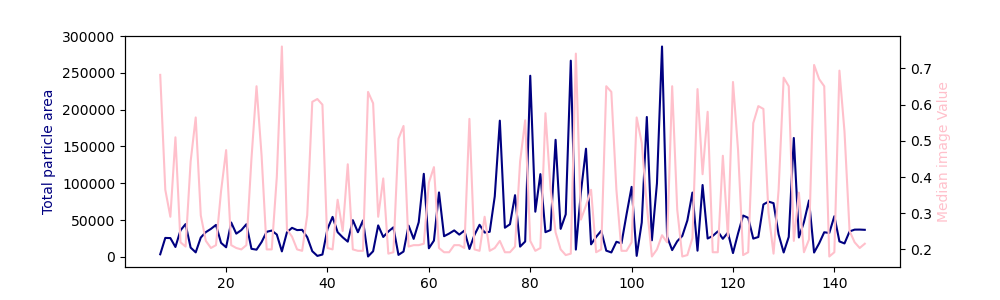

Text(0, 0.5, 'Median image Value')

In [5]:
plt.figure(figsize=(10,3))
plt.plot(np.array(order_number),total_area,color='navy')
plt.ylabel('Total particle area',color='navy')
plt.twinx()
plt.plot(np.array(order_number),image_values,color='pink')
plt.ylabel('Median image Value',color='pink')

## Median image value is the "HSV" color value of the image.  Images collected with bright backlighting during the day have a high median value (relatively light colors).

## There is clearly an effect of lightness on the ability to detect particles on the imaging plate


<IPython.core.display.Javascript object>


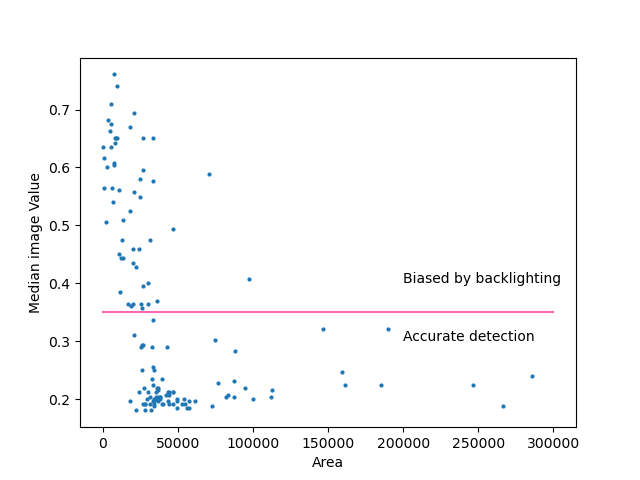

Text(200000, 0.3, 'Accurate detection')

In [6]:
plt.figure()
plt.plot(total_area,image_values,lw=0,marker='o',ms=2)
plt.xlabel('Area')
plt.ylabel('Median image Value')
plt.plot([0,300000],[0.35,0.35],color='hotpink')
plt.text(200000,0.4,'Biased by backlighting')
plt.text(200000,0.3,'Accurate detection')

## Used a median color value of 0.35 as the cut off for filtering out unuseful images

In [7]:
data_filtered=data[data.median_image_value<0.35]

In [8]:
#group data by image

total_area_filtered=data_filtered['Area'].groupby(data_filtered.file_name,sort=False).sum()
image_values_filtered=data_filtered['median_image_value'].groupby(data_filtered.file_name,sort=False).max()

order_number_filtered=data_filtered['number_list'].groupby(data_filtered.file_name,sort=False).max()

<IPython.core.display.Javascript object>


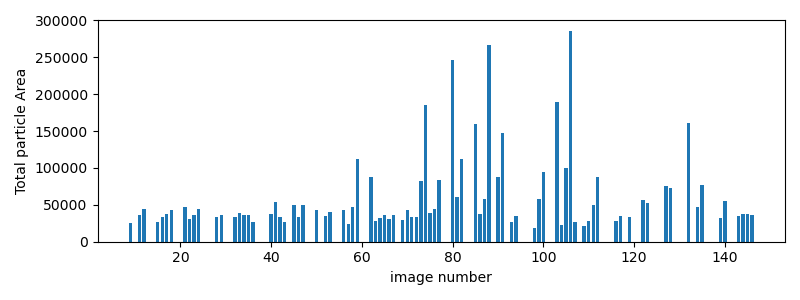

In [9]:
plt.figure(figsize=(8,3))
plt.bar(np.array(order_number_filtered),total_area_filtered,width=0.75)
plt.ylabel('Total particle Area')
plt.xlabel('image number')
plt.tight_layout()


## Separate these flux by particle size (ESD)
## Currently do not have correct scaling so the numbers are relative / unknown units

In [10]:
large=[]
small=[]
for x in data_filtered['number_list'].unique():
    image_data=data_filtered[data_filtered.number_list==x]
    large_data=image_data[image_data.ESD>100]
    small_data=image_data[image_data.ESD<=100]
    total_large=large_data['Area'].sum()
    total_small=small_data['Area'].sum()
    large.append(total_large)
    small.append(total_small)
    
    

<IPython.core.display.Javascript object>


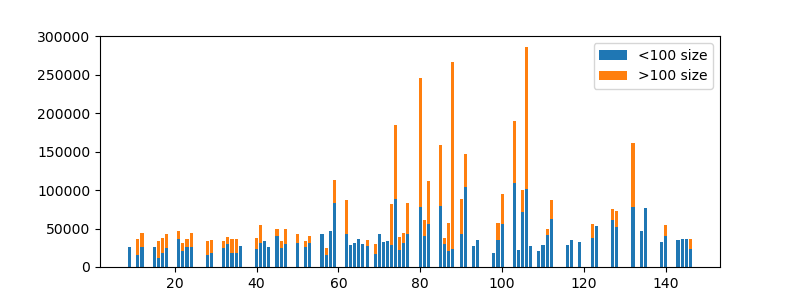

In [11]:
plt.figure(figsize=(8,3))
plt.bar(np.array(order_number_filtered),small,width=0.75,label='<100 size')
plt.bar(np.array(order_number_filtered),large,width=0.75,bottom=small,label='>100 size')

plt.legend()

## Increases in flux are caused by large particles